In [55]:
import PIL as pil
import numpy as np

im = pil.Image.open("panda.jpg")
#im.rotate(10).show()
np_im = np.array(im)

print(np_im.shape)
print(np_im[0,0,2])

(640, 600, 3)
254


In [92]:
def toGris(m, std=601):
    rec601 = (0.29894, 0.58704, 0.11402)
    rec709 = (0.2126, 0.7152, 0.0722)
    
    recStandard = rec601 if (std == 601) else rec709
    
    matrixCols = m.shape[0]
    matrixRows = m.shape[1]
    
    np_im = np.zeros((matrixCols,matrixRows))
    for i in range(matrixCols):
        for j in range(matrixRows):
            #convert to GreyScale (only RGB suppoted at the momment)
            np_im[i,j] = round(m[i,j,0] * recStandard[0])
            np_im[i,j] += round(m[i,j,1] * recStandard[1])
            np_im[i,j] += round(m[i,j,2] * recStandard[2])
            
            
    print(np_im.shape)
    print("min val: %s max val: %s" % (np_greyPanda.min(),np_greyPanda.max()))
    print("Using standard: rec%s" % (std))
    
    return np_im.astype(np.uint8)




pandaGris601 = pil.Image.fromarray(toGris(np_im))
pandaGris709 = pil.Image.fromarray(toGris(np_im, 709))
    

(640, 600)
min val: 2 max val: 255
Using standard: rec601
(640, 600)
min val: 2 max val: 255
Using standard: rec709


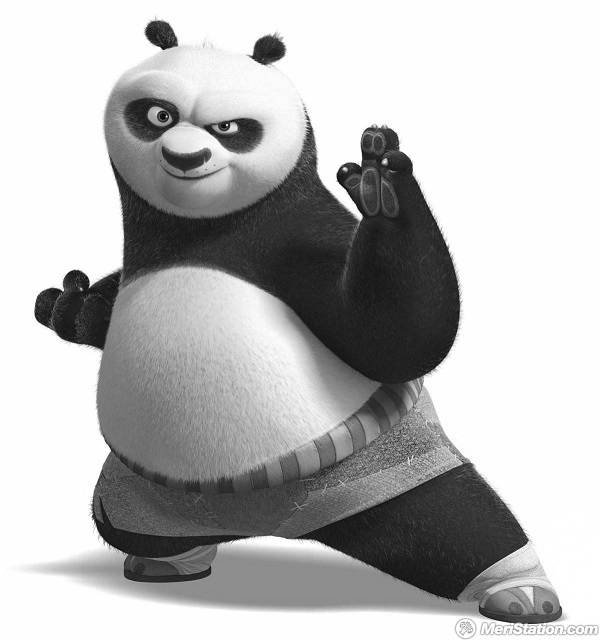

In [93]:
pandaGris601

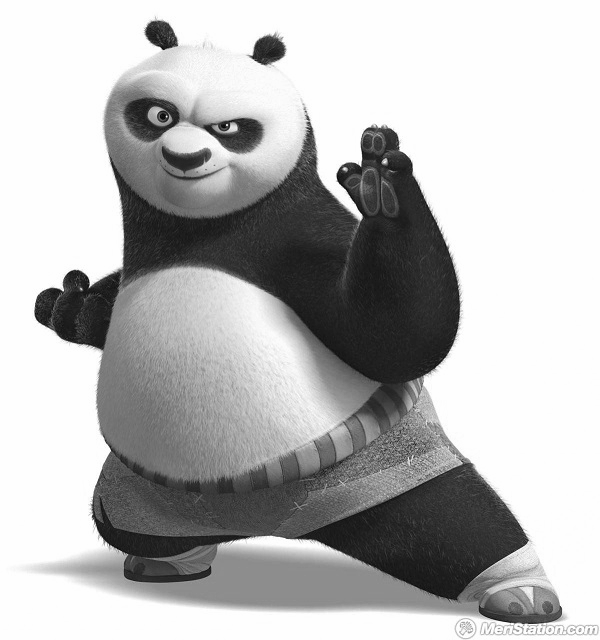

In [94]:
pandaGris709

##Tips:
https://stackoverflow.com/questions/10965417/how-to-convert-a-numpy-array-to-pil-image-applying-matplotlib-colormap

1. First ensure your NumPy array, myarray, is normalised with the max value at 1.0.
2. Apply the colormap directly to myarray.
3. Rescale to the 0-255 range.
4. Convert to integers, using np.uint8().
5. Use Image.fromarray().

In this example we are using two different methods to convert to gray-scale  

- https://en.wikipedia.org/wiki/Rec._601
- https://en.wikipedia.org/wiki/Luma_(video)

we are ignoring the most simple of (R+G+B)/3